In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
!pwd

/Users/heymanjake/Documents/Flatiron/phase_4_project


In [3]:
!ls

Alzheimer_s Dataset README.md           Untitled.ipynb


In [4]:
!unzip archive\ \(2\).zip

unzip:  cannot find or open archive (2).zip, archive (2).zip.zip or archive (2).zip.ZIP.


In [5]:
!ls

Alzheimer_s Dataset README.md           Untitled.ipynb


In [6]:
!rm archive\ \(2\).zip

rm: archive (2).zip: No such file or directory


In [7]:
directory = 'Alzheimer_s Dataset/'

In [8]:
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(224, 224), 
        batch_size = 6400, 
        seed = 123)

Found 6400 images belonging to 2 classes.


In [9]:
test_directory = 'Alzheimer_s Dataset/test/'

In [10]:
train_directory = 'Alzheimer_s Dataset/train/'

In [11]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        test_directory, 
        target_size=(224, 224), 
        batch_size = 1279, 
        seed = 123)

Found 1279 images belonging to 4 classes.


In [12]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        train_directory, 
        target_size=(224, 224), 
        batch_size = 5121, 
        seed = 123)

Found 5121 images belonging to 4 classes.


In [13]:
train_images, train_labels = next(data_train)

test_images, test_labels = next(data_test)

In [14]:
data_train.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [15]:
data_test.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [16]:
sum(train_labels)

array([ 717.,   52., 2560., 1792.], dtype=float32)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

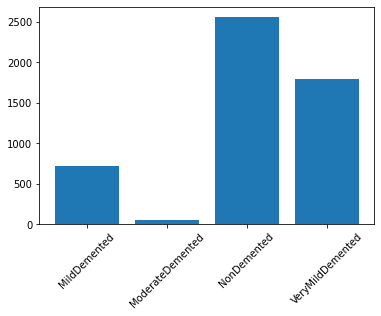

In [17]:
plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(train_labels))
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

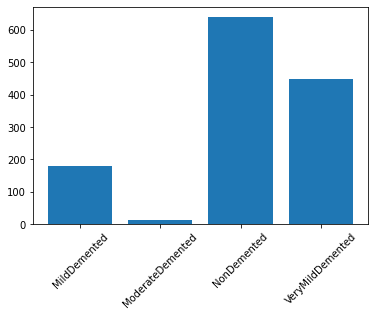

In [18]:
plt.bar(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], sum(test_labels))
plt.xticks(rotation=45)

In [19]:
def get_label(array):
    if array[0] ==1:
        return 'MildDemented'
    elif array[1] ==1:
        return 'ModerateDemented'
    elif array[2] ==1:
        return 'NonDemented'
    elif array[3] ==1:
        return 'VeryMildDemented'
        
        

In [20]:
label_names = np.apply_along_axis(get_label,1,train_labels)

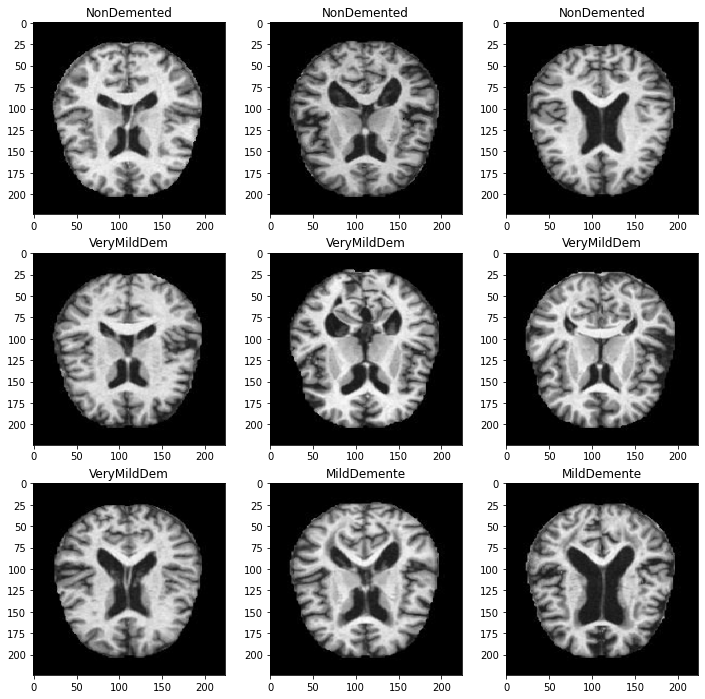

In [21]:
#visualize images

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[i])
  plt.gca().set_title(label_names[i])
plt.show()

In [22]:
#import scipy.misc
#import matplotlib.image as img
#from PIL import Image
#import imageio

In [24]:
#image_matrix = img.imread(train_images[0])
#i = Image.load(train_images[0])
#i = scipy.misc.imread(train_images[0])
#image_matrix = imageio.imread(train_images[0])
train_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [25]:
img_ts = image.img_to_array(train_images[0][0][0])

NameError: name 'image' is not defined

In [26]:
train_images[0][0][0]

array([0., 0., 0.], dtype=float32)

In [31]:
load_img(train_images[])

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

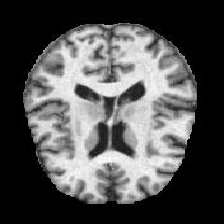

In [32]:
array_to_img(train_images[0])

In [34]:
train_images[0].shape

(224, 224, 3)

In [37]:
type(data_train)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [36]:
MildDemented = data_train.flow_from_directory('./Alzheimer_s Dataset/train/MildDemented')

AttributeError: 'DirectoryIterator' object has no attribute 'flow_from_directory'

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')